In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.describe(include = 'all')

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


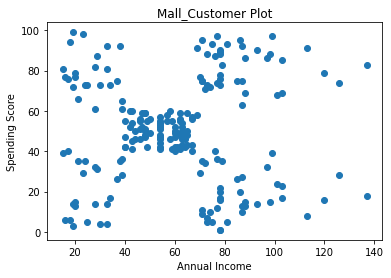

In [6]:
#Creating a scatter plot
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.title('Mall_Customer Plot')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [7]:
#selecting features
X = data.iloc[:,[3,4]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# Clustering

In [8]:
from sklearn.cluster import KMeans

In [9]:
#creating object of KMeans clustering with 2 clusters
kmeans = KMeans(2,random_state=10)

In [10]:
kmeans.fit(X)

KMeans(n_clusters=2, random_state=10)

In [11]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [12]:
#checking centroids
kmeans.cluster_centers_

array([[37.28888889, 50.28888889],
       [79.6       , 50.12727273]])

In [13]:
#creating a copy of the data, and adding a new colum 'Clusters' denoting the cluster in which each observation fails

data_new = data.copy()
data_new['Clusters'] = kmeans.labels_
data_new.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
5,6,Female,22,17,76,0
6,7,Female,35,18,6,0
7,8,Female,23,18,94,0
8,9,Male,64,19,3,0
9,10,Female,30,19,72,0


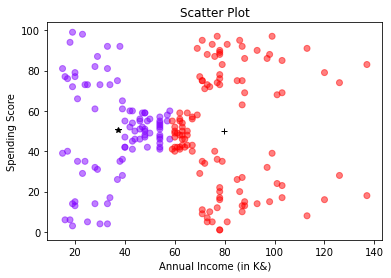

In [14]:
#plotting the scatter plot with the clusters in different colors

plt.scatter(data_new['Annual Income (k$)'], data_new['Spending Score (1-100)'],
           c=data_new['Clusters'], cmap='rainbow', alpha=0.5)
plt.plot(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], c='k', marker ='*')
plt.plot(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], c='k', marker ='+')
#plt.plot(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], c='k', marker ='o')

plt.title('Scatter Plot')
plt.xlabel('Annual Income (in K&)')
plt.ylabel('Spending Score')
plt.show()


# Selecting the number of clusers
We then use the 'Elbow Method' to find the optimal no. of clusters.

In [15]:
#checking WCSS
kmeans.inertia_

181363.59595959607

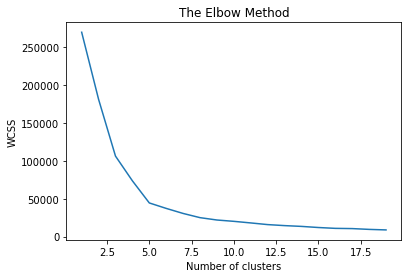

In [17]:
#plotting WCSS for different no. of clusters

wcss = []

for i in range(1,20):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# KMeans Clustering with 5 clusters

In [18]:
kmeans = KMeans(5, random_state=11)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=11)

In [19]:
kmeans.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [20]:
kmeans.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

In [21]:
data_new = data.copy()
data_new['Clusters'] = kmeans.labels_
data_new.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
5,6,Female,22,17,76,0
6,7,Female,35,18,6,3
7,8,Female,23,18,94,0
8,9,Male,64,19,3,3
9,10,Female,30,19,72,0


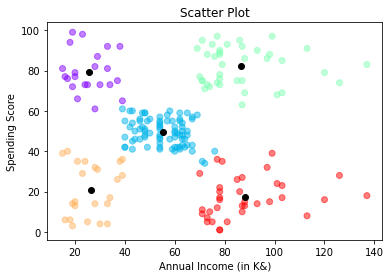

In [30]:
plt.scatter(data_new['Annual Income (k$)'], data_new['Spending Score (1-100)'], 
           c = data_new['Clusters'], cmap='rainbow', alpha=0.5)
plt.plot(kmeans.cluster_centers_[0,0], kmeans.cluster_centers_[0,1], c='k', marker ='o')
plt.plot(kmeans.cluster_centers_[1,0], kmeans.cluster_centers_[1,1], c='k', marker ='o')
plt.plot(kmeans.cluster_centers_[2,0], kmeans.cluster_centers_[2,1], c='k', marker ='o')
plt.plot(kmeans.cluster_centers_[3,0], kmeans.cluster_centers_[3,1], c='k', marker ='o')
plt.plot(kmeans.cluster_centers_[4,0], kmeans.cluster_centers_[4,1], c='k', marker ='o')

plt.title('Scatter Plot')
plt.xlabel('Annual Income (in K&)')
plt.ylabel('Spending Score')
plt.show()

In [31]:
data_new.groupby('Clusters').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
0,23.090909,25.272727,25.727273,79.363636
1,86.320988,42.716049,55.296296,49.518519
2,162.000000,32.692308,86.538462,82.128205
3,23.000000,45.217391,26.304348,20.913043
4,164.371429,41.114286,88.200000,17.114286


In [33]:
# selecting features

X = data.loc[:,['Age','Annual Income (k$)', 'Spending Score (1-100)']]
X.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


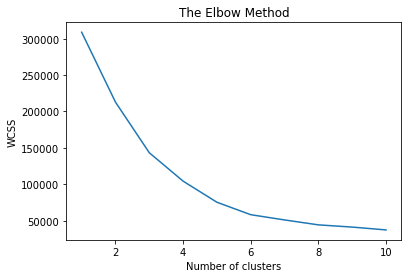

In [37]:
wcss = []
for i in range (1,11):
    kmeans = KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
kmeans = KMeans(5, random_state=12)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=12)

In [40]:
centroids = kmeans.cluster_centers_
centroids

array([[43.08860759, 55.29113924, 49.56962025],
       [40.66666667, 87.75      , 17.58333333],
       [45.2173913 , 26.30434783, 20.91304348],
       [25.52173913, 26.30434783, 78.56521739],
       [32.69230769, 86.53846154, 82.12820513]])

In [41]:
kmeans.labels_

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [42]:
data_new = data.copy()
data_new['Clusters'] = kmeans.labels_
data_new.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2
5,6,Female,22,17,76,3
6,7,Female,35,18,6,2
7,8,Female,23,18,94,3
8,9,Male,64,19,3,2
9,10,Female,30,19,72,3


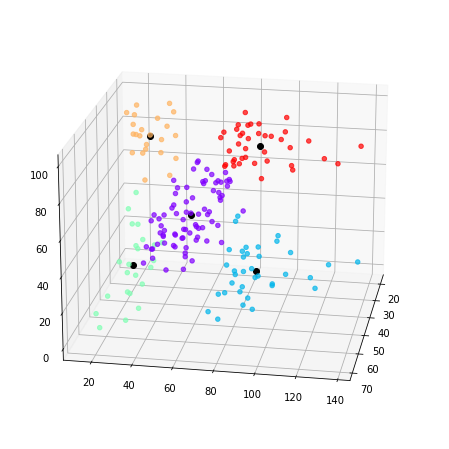

In [46]:
#3D visualization of clusters and centroids

from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.view_init(20,10)

ax.scatter3D(data_new['Age'],data_new['Annual Income (k$)'],data_new['Spending Score (1-100)'],
            c=data_new['Clusters'], cmap='rainbow',alpha=0.7)

ax.plot([centroids[0,0]], [centroids[0,1]],[centroids[0,2]], c='k',marker='o')
ax.plot([centroids[1,0]], [centroids[1,1]],[centroids[1,2]], c='k',marker='o')
ax.plot([centroids[2,0]], [centroids[2,1]],[centroids[2,2]], c='k',marker='o')
ax.plot([centroids[3,0]], [centroids[3,1]],[centroids[3,2]], c='k',marker='o')
ax.plot([centroids[4,0]], [centroids[4,1]],[centroids[4,2]], c='k',marker='o')

plt.show()

In [47]:
data_new.groupby('Clusters').mean()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
0,86.265823,43.088608,55.291139,49.569620
1,163.500000,40.666667,87.750000,17.583333
2,23.000000,45.217391,26.304348,20.913043
3,24.000000,25.521739,26.304348,78.565217
4,162.000000,32.692308,86.538462,82.128205
